![Gesund](https://egirisim.com/wp-content/uploads/2023/08/gesund-ai-1068x580.jpg)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gesund-ai/gesund/blob/main/gesund/examples/object_detection_malaria.ipynb)

# Object Detection on Malaria Dataset 

This notebook provides and example of Gesund Validation with Object Detection

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>

### Dataset Name: [Malaria Blood Cell](https://app.gesund.ai/data/dataset-details/Dataset10/overview)


To download the required JSON files, run the following commands in a Jupyter notebook cell


In [2]:
# Object Detection Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/annotation.json
# Object Detection Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/prediction.json
# Object Detection Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/test_class_mappings.json

--2024-12-04 13:19:03--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/annotation.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482615 (471K) [text/plain]
Saving to: ‘annotation.json’

annotation.json     100%[===================>] 471.30K  --.-KB/s    in 0.04s   

2024-12-04 13:19:04 (12.7 MB/s) - ‘annotation.json’ saved [482615/482615]

--2024-12-04 13:19:05--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/prediction.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|1

## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `object detection validation` on your data. 

In [1]:
from gesund.validation import Validation

In [2]:
data_dir = "./tests/_data/object_detection"
plot_config = {
        'mixed_plot': {'mixed_plot': ['map10', 'map50', 'map75'], 'threshold': 0.5}, 
        'top_misses': {'min_miou': 0.70, 'top_n': 10}, 
        'confidence_histogram': {'confidence_histogram_labels': ['TP', 'FP']}, 
        'classbased_table': {'classbased_table_metrics': ['precision', 'recall', 'f1'], 'threshold': 0.2}, 
        'overall_metrics': {'overall_metrics_metrics': ['map', 'mar'], 'threshold': 0.5}, 
        'blind_spot': {'blind_spot_Average': ['mAP@50', 'mAP@10','mAR@max=10','mAR@max=100'],'threshold': 0.5} 
}

Explanation of plot config values and keys

<hr />

The plot config dictionary outlines various plots and metrics you might want to generate for object detection problem, providing specific details for each plot type and associated metrics.

`mixed_plot`: A list of metrics or keys related to mixed plots (e.g., ['map10', 'map50', 'map75']). These could refer to different Mean Average Precision (mAP) values at different thresholds.

`threshold`: A numerical value (0.5) that may be used as a cut-off or threshold for the mixed plot analysis.

`top_misses`:
- min_miou: A minimum Intersection over Union (IoU) value (0.70) for considering misses. IoU is a measure used to evaluate the accuracy of an object detector on a particular dataset.
- top_n: A number (10) indicating the top N misses to consider or display.

`confidence_histogram`
- confidence_histogram_labels: A list of labels for the confidence histogram (e.g., ['TP', 'FP']). TP stands for True Positives, and FP stands for False Positives.

`classbased_table`
- classbased_table_metrics: A list of metrics for a class-based table (e.g., ['precision', 'recall', 'f1']). These metrics are commonly used to evaluate classification models.
- threshold: A numerical value (0.2) used as a threshold for evaluating class-based metrics.

`overall_metrics`
- overall_metrics_metrics: A list of overall metrics (e.g., ['map', 'mar']). mAP stands for Mean Average Precision, and MAR stands for Mean Average Recall.
- threshold: A numerical value (0.5) used as a threshold for overall metrics evaluation.

`blind_spot`
- blind_spot_Average: A list of metrics related to blind spot analysis (e.g., ['mAP@50', 'mAP@10', 'mAR@max=10', 'mAR@max=100']). These metrics include Mean Average Precision at 50% and 10% thresholds, and Mean Average Recall at different maximum values.
- threshold: A numerical value (0.5) used as a threshold for blind spot analysis.


<hr />

In [3]:
obj_detect_validation = Validation(
    annotations_path=f"{data_dir}/gesund_custom_format/annotation.json",
    predictions_path=f"{data_dir}/gesund_custom_format/prediction.json",
    problem_type="object_detection",
    class_mapping=f"{data_dir}/test_class_mappings.json",
    data_format="json",
    json_structure_type="gesund",
    metadata_path=f"{data_dir}/test_metadata.json",
    return_dict=True,
    display_plots=False,
    store_plots=False,
    plot_config=plot_config,
    run_validation_only=True
)

annotations path validated !
predictions path validated !
class mapping file validated !
Problem Type validated !
JSON structure type validated!
Data format validated!
metadata path validated !


#### Argument Explanations

<hr/>


The argumment input consists of the data path and parameters.

1. Annotation data: `annotations_path`:  the path of the json file containing the annotation data with respect to the images.
The structure of the annotation should be as follows

```
{
   "image_id_value": {
	"image_id": image_id_value,
	"annotation": [
	  {
		"id": annotation_id_value,
		"label": truth_label_value 
			],
    	   },
	   ...
	]
   }
}
```


2. Prediction: `predictions_path`: the json file path containing the prediction data with respect to the images.
The structure of the prediction could be as follows, if the input data is from the 

```
{
   "image_id_value": {
           "image_id": string_image_id,
		   "prediction_class": integer_prediction_class,
		   "confidence": integer_confidence_score,
           "logits": integer_logits,
           "loss": integer_loss_value
		},
		...
}

```

3. Label dictionary: `class_mappings`: Label mapping of the class labels
It could be a file or dictionary 


4. Problem Type: `problem_type`: Type of the problem in this context is `object_detection` 

5. Data Format: `data_format`: Format of the file. In this context it is a json file.


6. JSON structure type: `json_structure_type`: could be 'coco', 'yolo' or 'gesund'. The prior two are standards as followed in general and the last format is as explained in point 1 and 5.

7. Metadata path: `metadata_path`: Path directing the metadata file. Please note the data format of the metadata should be the same as prediction / annnotation file format

8. Return dictionary: `return_dict`: boolean value flag indicating if the results are supposed to be returned. When true, ResultDataClassification object is returned.

9. Display plot: `display_plots`: boolean value flag indicating if the plots are required to be displayed.

10. Store plots: `store_plots`: boolean value flag indicating if the plots are required to be stored.

11. Plot config: `plot_config`: dictionary containing the configurations required for the plot

12. Run validation only: `run_validation_only`: boolean value flag indicating if to run validation only.


<hr />


In [5]:
obj_detect_validation.__dict__

{'user_params': UserInputParams(annotations_path='./tests/_data/object_detection/gesund_custom_format/annotation.json', predictions_path='./tests/_data/object_detection/gesund_custom_format/prediction.json', class_mapping='./tests/_data/object_detection/test_class_mappings.json', problem_type='object_detection', json_structure_type='gesund', data_format='json', plot_config={'mixed_plot': {'mixed_plot': ['map10', 'map50', 'map75'], 'threshold': 0.5}, 'top_misses': {'min_miou': 0.7, 'top_n': 10}, 'confidence_histogram': {'confidence_histogram_labels': ['TP', 'FP']}, 'classbased_table': {'classbased_table_metrics': ['precision', 'recall', 'f1'], 'threshold': 0.2}, 'overall_metrics': {'overall_metrics_metrics': ['map', 'mar'], 'threshold': 0.5}, 'blind_spot': {'blind_spot_Average': ['mAP@50', 'mAP@10', 'mAR@max=10', 'mAR@max=100'], 'threshold': 0.5}}, metadata_path='./tests/_data/object_detection/test_metadata.json', return_dict=True, display_plots=False, store_plots=False, run_validation_

#### Class instance attributes

<hr />

1. `user_params`: A pydantic model following the schema *UserInputParams* that contains all the parameters provided

2. `data`: A pydantic model following the *UserInputData* that contains all the loaded user data.

3. `batch_job_id`: Id of the batch execution. This helps in running multiple validation runs with same batch id. Usign the batch id it is possible to organize and segregate the results.

4. `output_dir`: Directory of the output

5. `problem_type_result_map`: Mapping of result data schema corresponding to the problem type




<hr />

## <a id="results">Explore Results</a>

In [4]:
results = obj_detect_validation.run()

Loss not found.


Calling all plot functions:   0%|                                                                                                                                                                          | 0/11 [00:00<?, ?it/s]

Calling method: main_metric...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Calling all plot functions:   9%|██████████████▋                                                                                                                                                   | 1/11 [00:04<00:44,  4.46s/it]

DONE (t=4.35s).
Accumulating evaluation results...
DONE (t=0.03s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
Calling method: plot_blind_spot_metrics...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t

Calling all plot functions:  18%|█████████████████████████████▍                                                                                                                                    | 2/11 [00:13<01:04,  7.19s/it]

DONE (t=4.37s).
Accumulating evaluation results...
DONE (t=0.09s).
[0, 1, 2, 3, 4, 5]
Calling method: plot_confidence_histogram_scatter_distribution...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Calling all plot functions:  27%|████████████████████████████████████████████▏                                                                                                                     | 3/11 [00:18<00:47,  5.94s/it]

DONE (t=4.36s).
Accumulating evaluation results...
DONE (t=0.08s).
Calling method: plot_highlighted_overall_metrics...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Calling all plot functions:  36%|██████████████████████████████████████████████████████████▉                                                                                                       | 4/11 [00:22<00:37,  5.35s/it]

DONE (t=4.35s).
Accumulating evaluation results...
DONE (t=0.08s).
[0, 1, 2, 3, 4, 5]
Calling method: plot_meta_distribution...
Calling method: plot_object_counts...
Calling method: plot_performance_by_iou_threshold...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.34s).
Accumulating evaluation results...
DONE (t=0.03s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating 

Calling all plot functions:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 7/11 [00:35<00:19,  4.80s/it]

DONE (t=4.39s).
Accumulating evaluation results...
DONE (t=0.08s).
[0, 1, 2, 3, 4, 5]
Calling method: plot_prediction_distribution...
Calling method: plot_statistics_classbased_table...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Calling all plot functions:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 9/11 [00:40<00:07,  3.84s/it]

DONE (t=4.36s).
Accumulating evaluation results...
DONE (t=0.03s).
[0]
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
[1]
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
[2]
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
[3]
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
[4]
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
[5]
Calling method: plot_top_misses...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation typ

Calling all plot functions:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 10/11 [00:44<00:03,  3.97s/it]

DONE (t=4.37s).
Accumulating evaluation results...
DONE (t=0.09s).
Calling method: plot_training_validation_comparison_classbased_table...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Calling all plot functions: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:49<00:00,  4.48s/it]

DONE (t=4.33s).
Accumulating evaluation results...
DONE (t=0.09s).
[0, 1, 2, 3, 4, 5]


### Results breakdown

<hr />
When you run the above cell, logs will appear stating the progress of the validation execution. The results could be explained, the `results` returned by the `run_metrics` and the `outputs` folder produced in the process are the same only in different forms. To understand in detail about what validation metrics mean, please visit the explaination <a href="https://gesund-ai.github.io/validation_metrics.html">here</a>


Following is the directory structure of the folder.
```
-- outputs
 |- batch_job_id  
   |- plot_jsons  # json files
      |- main_metric.json
      ...
   |- plot 
      |- blind_spot.png
      ... 
```


Results: `results`: consists of following keys 
- `main_metric`: contains the mean average precision value at 10 threshold.
- `plot_blind_spot_metrics`: contains the dictionary for all the classes involved. For each class average precision, average recall are calculated at thresholds 10, 50, 75, at an interval of [.50, .95], max at 1, 10, 100.
- `plot_confidence_histogram_scatter_distribution`: contains the data for plotting the histogram scatter distribution
- `plot_highlighted_overall_metrics`: contains the data for plotting mean average preicion and recall at specific thresholds
- `plot_meta_distribution`: contains the data for plotting bar charts where the data is plotted only when metadata is available in the input
- `plot_object_counts`: contains the distribution count of samples in the input data
- `plot_performance_by_iou_threshold`: contains the data for mean average precision and recall at specific thresholds
- `plot_prediction_distribution`: contains the data for pie chart distribution of prediction of classes
- `plot_statistics_classbased_table`: contains the class-wise data for each class with average precision and recall at the specific thresholds
- `plot_top_misses`: contains the mean intersection over union ranked in descending order and corresponding image ids indicating the top misses by the model
- `plot_training_validation_comparison_classbased_table`: contains data for plotting bar chart with mean average precision at specific threshold

<hr />

### Output JSON file breakdown

The JSON files are found under the 

```
outputs/
|- batch_job_id
   |- plot_jsons
```

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import os

In [ ]:
batch_id = obj_detect_validation.batch_job_id
folder_path = os.path.join(*["outputs", batch_id, "plot_jsons"])
folder_path

'outputs/6728d6c5d5bf2d9b8f9fbefc/plot_jsons'

As mentioned above the JSON files contains the same data as in the result variable. The files are provided for persistent storage of data.

### Output plot breakdown

The plots could be found under the following folder location

```
outputs/
|- batch_job_id
   |- plots
```

In [11]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [ ]:
batch_id = obj_detect_validation.batch_job_id
image_folder = os.path.join(*["outputs", batch_id, "plots"])

def load_image(image_file):
    img_path = os.path.join(image_folder, image_file) 
    img = mpimg.imread(img_path) 
    plt.imshow(img)
    plt.axis("off")

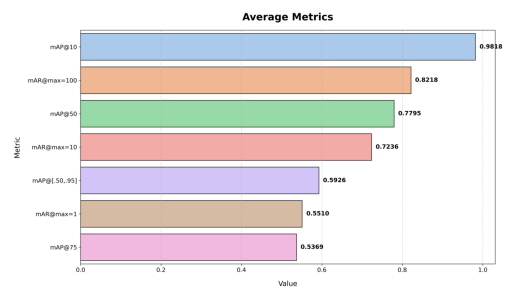

In [13]:
load_image("blind_spot.png")

`Average metrics` Each bar represents a different metric, with the length of the bar indicating the value. The x-axis ranges from 0 to 1, showing the performance or measurement across mean average precision and recall along the threshold.

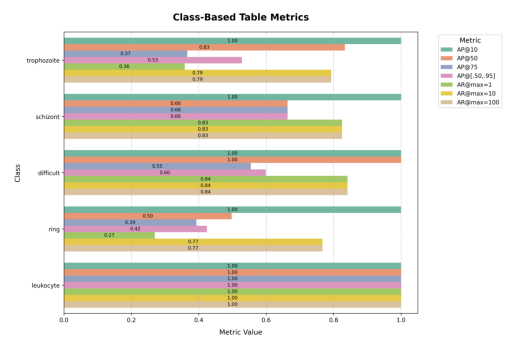

In [14]:
load_image("classbased_table.png")

`Class-based Table metrics` The class based table metrics provides the bar chart information for each class involved in the validation metrics for average precision and recall at threshold.

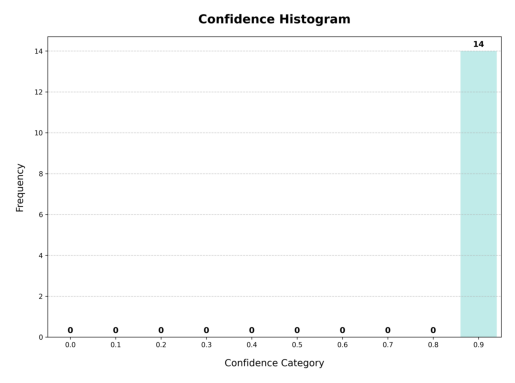

In [15]:
load_image("confidence_histogram_histogram.png")

`Confidence histogram` The plot describes the confidence distribution for the prediction values. This helps in identifying the samples with confidence value.

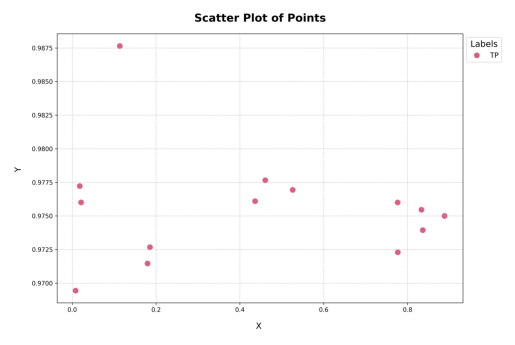

In [16]:
load_image("confidence_histogram_scatter.png")

`Confidence distribution scatter` plots the confidence scores from the samples. This helps in discovering any relationship between the samples of distributions.

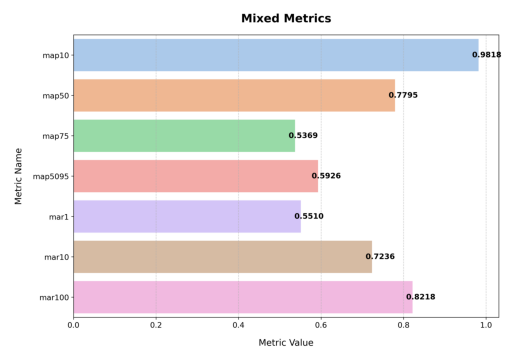

In [17]:
load_image("mixed_plot.png")

`Mixed metrics` plots the average precision score and average recall score at the thresholds.

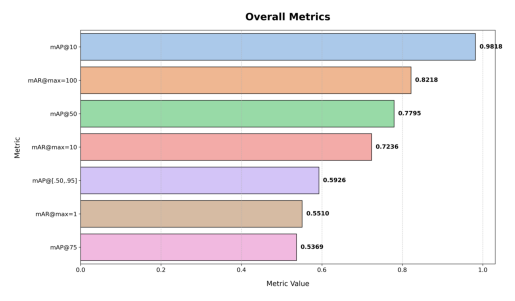

In [18]:
load_image("overall_metrics.png")

`Overall metrics` plots the metrics calculated overall the samples.

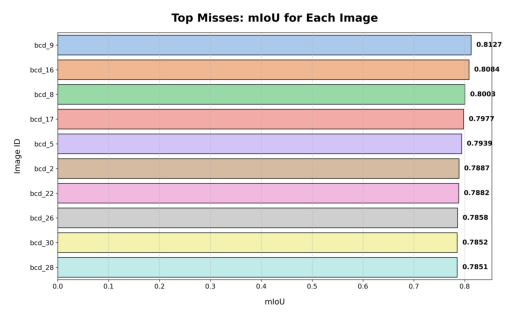

In [19]:
load_image("top_misses.png")

`Top misses` ranks the top images corresponding to the mean intersection over union values.